/usr/local/lib/python3.7/dist-packages/sklearn/ensemble/_gb.py:297: FutureWarning: The loss 'lad' was deprecated in v1.0 and will be removed in version 1.2. Use 'absolute_error' which is equivalent.
  FutureWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/ensemble/_gb.py:297: FutureWarning: The loss 'lad' was deprecated in v1.0 and will be removed in version 1.2. Use 'absolute_error' which is equivalent.
  FutureWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/ensemble/_gb.py:297: FutureWarning: The loss 'lad' was deprecated in v1.0 and will be removed in version 1.2. Use 'absolute_error' which is equivalent.
  FutureWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/ensemble/_gb.py:297: FutureWarning: The loss 'lad' was deprecated in v1.0 and will be removed in version 1.2. Use 'absolute_error' which is equivalent.
  FutureWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/ensemble/_gb.py:297: FutureWarning: The loss 'lad' was deprecated in v1.0 and will be rem

Q2: -0.04279401627761953
r2_test: 0.3618594847277937
MAE_test: 0.042683676086711614
MSE_test: 0.005415256534552997
RMSE_test: 0.07358842663458023
r2_train: 0.5105526188426981
MAE_train: 0.026232605378794717
MSE_train: 0.0029636037964769915
RMSE_train: 0.054438991508632774


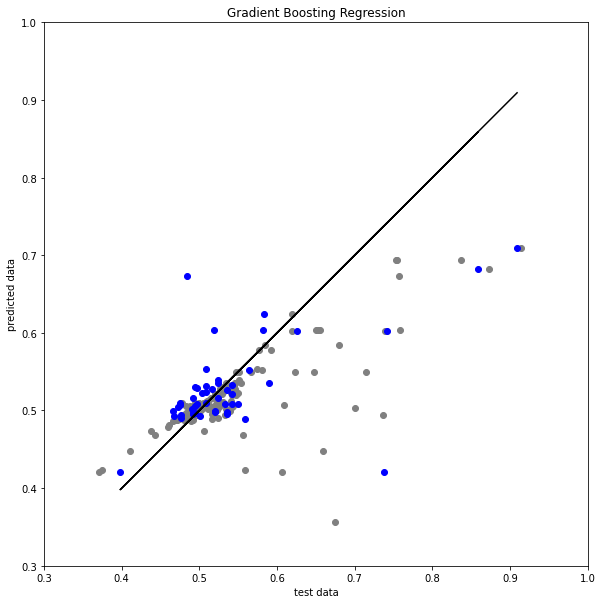

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.model_selection import train_test_split

db = pd.read_csv('Database.csv')
x = db.loc[:,'Electronegativity':'Exposure dose (ug/mL)'].values
y = db.loc[:,'Newtox'].values
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=7)

from sklearn.preprocessing import MinMaxScaler
sc = MinMaxScaler()
x_train = sc.fit_transform(x_train)
x_test = sc.transform(x_test)

from sklearn.ensemble import GradientBoostingRegressor

regressor = GradientBoostingRegressor(learning_rate=0.1, n_estimators=10, min_samples_split=2, min_samples_leaf=1, loss='lad', max_depth=22, max_features='log2')

regressor.fit(x_train, y_train)

y_pred = regressor.predict(x_test)
y1_pred = regressor.predict(x_train)


from sklearn.model_selection import cross_val_predict
from sklearn.model_selection import cross_val_score
accuracy=cross_val_score(regressor, x_train, y_train, cv=20,
                        scoring='neg_mean_absolute_error')
print("Q2:",accuracy.mean())

from sklearn import metrics
c, dx = plt.subplots(figsize=(13, 10))
print('r2_test:', metrics.r2_score(y_test, y_pred))
print('MAE_test:', metrics.mean_absolute_error(y_test, y_pred))
print('MSE_test:', metrics.mean_squared_error(y_test, y_pred))
print('RMSE_test:', np.sqrt(metrics.mean_squared_error(y_test, y_pred)))
print('r2_train:', metrics.r2_score(y_train, y1_pred))
print('MAE_train:', metrics.mean_absolute_error(y_train, y1_pred))
print('MSE_train:', metrics.mean_squared_error(y_train, y1_pred))
print('RMSE_train:', np.sqrt(metrics.mean_squared_error(y_train, y1_pred)))
plt.scatter(y_train, y1_pred, color='gray')
plt.scatter(y_test, y_pred, color = 'blue')
plt.plot(y_test, y_test, color = 'black')
plt.title('Gradient Boosting Regression')
plt.xlabel('test data')
plt.ylabel('predicted data')
plt.xlim(0.3, 1)
plt.ylim(0.3, 1)
plt.gca().set_aspect('equal', adjustable='box')
plt.show()